# My data analysis with the Stackoverflow data

This is my data analysis using the Stackoverflow data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 84)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('./../../data/stackoverflow/survey_results_public.csv', index_col= 'Respondent')
df.shape

(88883, 84)

In [3]:
df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [4]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

# Data clean up

## Understanding Developer Types

First I will replace the data with something smaller and more meaningful.

In [5]:
replacement = {
    "I am a developer by profession": "Professional", 
    "I am a student who is learning to code": "Student", 
    "I am not primarily a developer, but I write code sometimes as part of my work": "Sometimes",
    "I code primarily as a hobby": "Hobby",
    "I used to be a developer by profession, but no longer am": "X-Developer"
}

In [6]:
# df["MainBranch"] = df["MainBranch"].replace(replacement, regex=True)
df["MainBranch"] = df["MainBranch"].replace(replacement)
df["MainBranch"].head()

Respondent
1         Student
2         Student
3       Sometimes
4    Professional
5    Professional
Name: MainBranch, dtype: object

In [7]:
main_branch_count = df['MainBranch'].value_counts()
main_branch_count

MainBranch
Professional    65679
Student         10189
Sometimes        7539
Hobby            3340
X-Developer      1584
Name: count, dtype: int64

In [8]:
mb_label = main_branch_count.index.to_list()
mb_counts = main_branch_count.to_list()

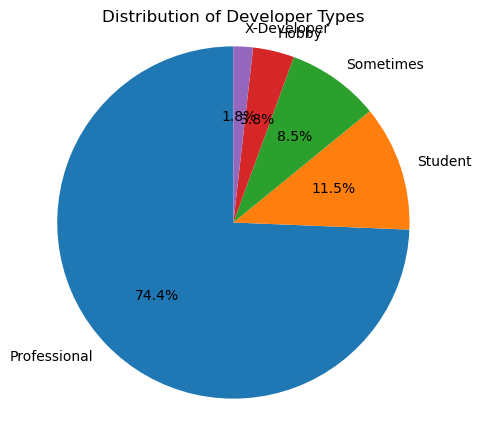

In [9]:
plt.figure(figsize=(5, 5))
plt.pie(mb_counts, labels=mb_label, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Developer Types")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

plt.show()

## Observations

Well, a basic trial to see what's the distribution of developers who have taken the survey.

1. Clearly, the most users are professionals. 
1. And, the we have a lot of students who are active on stack overflow and then people who are coding sometimes. 
1. X-Developers are the leat which does make sense. 

However, the hobby ones are the least which makes sense because they don't code so frequently.

### Understanding Years of code

In [10]:
years_of_code = df['YearsCode'].value_counts().sort_values(ascending=False)
years_lt_2000 = years_of_code[years_of_code < 2000]

In [11]:
def remove_years_of_code_lt_2000(value):
    if value in years_lt_2000:
        return 'Others'
    else:
        return value

In [12]:
df['YearsCode'] = df['YearsCode'].apply(remove_years_of_code_lt_2000)

In [13]:
prof_with_exp = df[(df['YearsCode'] != 'Others') & (df['MainBranch'] == 'Professional')]
# prof_with_exp['YearsCode'].value_counts(ascending=False).head(15)

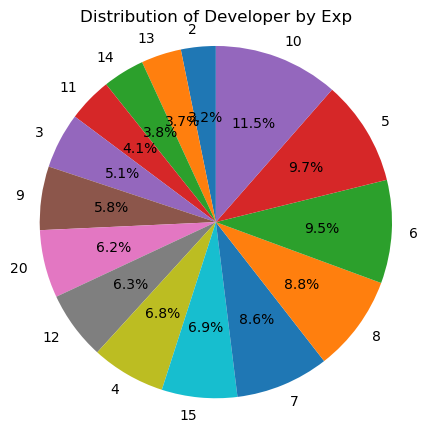

In [14]:
years_of_code_count = prof_with_exp['YearsCode'].value_counts(ascending=True)
mb_label = years_of_code_count.index.to_list()
mb_counts = years_of_code_count.to_list()

plt.figure(figsize=(5, 5))
plt.pie(mb_counts, labels=mb_label, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Developer by Exp")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart

plt.show()

In [15]:
df.rename(columns={'ConvertedComp': 'SalaryUSD'}, inplace=True)
df.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Student,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,Student,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [16]:
bins = range(0, 56, 5)  # Bin edges from 0 to 55 in increments of 5
# test = pd.cut(df['YearsCode'], bins=bins)

In [17]:
pd.set_option('display.max_rows', 200)
test = pd.read_csv('./../../data/stackoverflow/survey_results_public.csv', index_col= 'Respondent')

In [18]:
# test['YearsCode'] = test['YearsCode'].replace({'More than 50 years': 90, 'Less than 1 year': 0, 'Nan': 0}, inplace=True)
replacement = {'More than 50 years': 90, 'Less than 1 year': 0};
dev_exp = test['YearsCode']
dev_exp = dev_exp.dropna()
dev_exp = dev_exp.replace(replacement)

bins = range(0, 91, 5)
labels = [f"{b}-{b+5}" for b in bins[:-1]]
dev_exp = pd.to_numeric(dev_exp)
dev_exp = pd.cut(dev_exp, bins=bins, labels=labels)
dev_exp_graph = dev_exp.value_counts().sort_index(ascending=True)

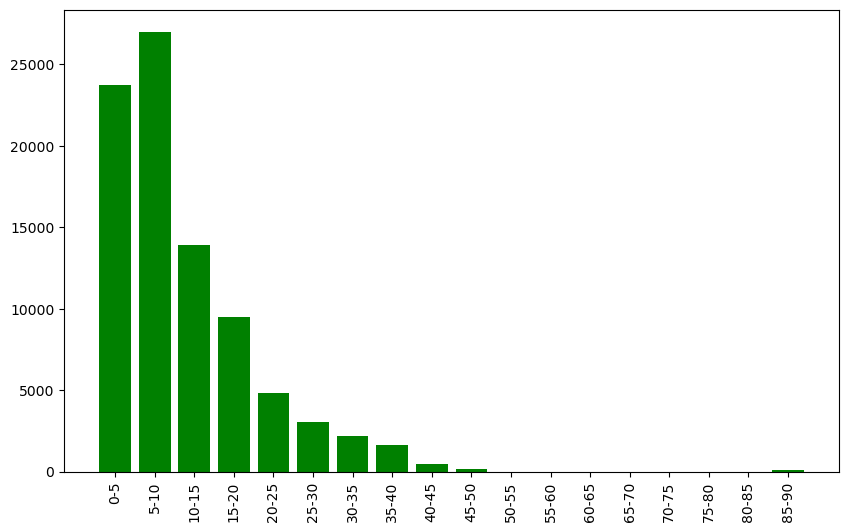

In [19]:
mb_label = dev_exp_graph.index.to_list()
mb_counts = dev_exp_graph.to_list()

plt.figure(figsize=(10, 6))
plt.bar(mb_label, mb_counts, color='green')
plt.xticks(rotation=90)
plt.show()

## Trying to sort data

In [20]:
df.sort_values(by=['Country'], inplace=True)
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,SalaryUSD,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39258,Professional,Yes,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Afghanistan,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Database administrator;Designer;Developer, bac...",2,22,1,Very satisfied,Very satisfied,Very confident,No,Yes,"I’m not actively looking, but I am open to new...",1-2 years ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...","Something else changed (education, award, medi...",AFN,Afghan afghani,120000.0,Monthly,19152.0,49.0,There is a schedule and/or spec (made by me or...,Not enough people for the workload;Time spent ...,Less than once per month / Never,Office,Far above average,"Yes, because I see value in code review",10.0,"Yes, it's not part of our process but the deve...",Developers typically have the most influence o...,I have some influence,HTML/CSS;JavaScript;PHP;SQL;TypeScript,C#;Dart;JavaScript;SQL;TypeScript,MariaDB;MongoDB;MySQL;PostgreSQL,Couchbase;Firebase;MariaDB;MongoDB;Redis,Android;AWS;Linux;Windows;WordPress,Android;AWS;Docker;Heroku;iOS;Linux;Raspberry ...,Angular/Angular.js;Drupal;Express;Laravel,Angular/Angular.js;Drupal;Express,Cordova;Node.js,Hadoop;Node.js,Notepad++;PHPStorm;Vim;Visual Studio Code,Linux-based,Production,NaN,NaN,Yes,Yes,No,Facebook,Online,Login,2016,A few times per week,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,0-10 minutes,Yes,Less than once per month or monthly,Yes,NaN,"Yes, somewhat",NaN,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,East Asian;South Asian,Yes,Too long,Easy
63129,Professional,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Afghanistan,"Yes, full-time",I never completed any formal education,NaN,Taken an online course in programming or softw...,"Just me - I am a freelancer, sole proprietor, ...",NaN,Others,Younger than 5 years,1,Very dissatisfied,Very dissatisfied,Very confident,Yes,Yes,I am actively looking for a job,I've never had a job,Write any code,Yes,How widely used or impactful my work output wo...,I had a negative experience or interaction at ...,AED,United Arab Emirates dirham,648838511.0,Monthly,1000000.0,168.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work,It's complicated,"Other place, such as a coworking space or cafe",Far below average,No,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;Other(s):,Bash/Shell/PowerShell;TypeScript,MySQL,MySQL,Android;iOS;Windows;WordPress;Other(s):,Android;iOS;Windows;WordPress;Other(s):,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Ansible;Apache Spark;Torch/PyTorch,Apache Spark;Torch/PyTorch,Android Studi

In [21]:
df['SalaryUSD'].median()

57287.0

The median salary based on the data is **57,287.0**

However, do note this is based on different countries so it's not an ideal data.

In [22]:
df.describe()

,CompTotal,SalaryUSD,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [23]:
df['SocialMedia'].value_counts().head(5)

SocialMedia
Reddit      14374
YouTube     13830
WhatsApp    13347
Facebook    13178
Twitter     11398
Name: count, dtype: int64

In [24]:
df['SocialMedia'].value_counts(normalize=True).head(5)

SocialMedia
Reddit      0.170233
YouTube     0.163791
WhatsApp    0.158071
Facebook    0.156069
Twitter     0.134988
Name: proportion, dtype: float64

In [25]:
country_grp = df.groupby(['Country'])
country_grp['SocialMedia'].value_counts().head(10)

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
             LinkedIn                     1
             Twitter                      1
Albania      WhatsApp                    18
             Facebook                    16
             Instagram                   13
Name: count, dtype: int64

In [26]:
country_grp['SalaryUSD'].median().loc['India']

10080.0

In [27]:
country_grp['SalaryUSD'].agg(['median', 'mean', 'max', 'min']).loc[['India', 'Germany']]

,median,mean,max,min
Country,,,,
India,10080.0,28057.664916,2000000.0,0.0
Germany,63016.0,109256.884066,2000000.0,0.0


In [30]:
filt = df['Country'] == 'India'
print(df.loc[filt]['LanguageWorkedWith'].str.contains('Python').sum())

3105
